# トレード集計

In [1]:
import sys
sys.path.append('../')
%cd '..'

/home/tsu-nera/repo/bakuchi


In [2]:
import src.utils.trades_report as report

%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import japanize_matplotlib

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

In [4]:
results = report.read_results()

In [5]:
# results

In [6]:
trades = pd.DataFrame()

In [7]:
trades["Bot利益"] = results["bot_profit_jpy"]
trades["市場利益"] = results["market_profit_jpy"]
trades["取引利益"] = results["trade_profit_jpy"]
trades.index.name = "トレード日時"

In [8]:
trades.tail(10)

,Bot利益,市場利益,取引利益
トレード日時,,,
2020-03-25 00:58:33,176.0,181.890,-5.890
2020-03-25 03:54:00,-154.0,-5.199,-148.801
2020-03-25 10:52:19,21.0,48.848,-27.848
2020-03-25 17:03:03,-505.0,-33.667,-471.333
2020-03-30 00:39:55,241.0,459.642,-218.642
2020-04-03 09:45:17,-199.0,25.263,-224.263
2020-04-21 00:43:33,-598.0,-515.144,-82.856
2020-04-21 09:39:06,-208.0,-171.914,-36.086
2020-05-04 18:41:28,101.0,99.692,1.308


## 累計利益

In [9]:
trades["date"] = pd.to_datetime(trades.index).date

In [10]:
trades_days = trades.groupby("date").sum()
trades_days_comsum = trades_days.cumsum()

In [11]:
trades_days["Bot利益[累計]"] = trades_days_comsum["Bot利益"]
trades_days["市場利益[累計]"] = trades_days_comsum["市場利益"]
trades_days["取引利益[累計]"] = trades_days_comsum["取引利益"]
trades_days.index.name = "日付"

In [12]:
trades_days.tail(10)

,Bot利益,市場利益,取引利益,Bot利益[累計],市場利益[累計],取引利益[累計]
日付,,,,,,
2020-03-18,-416.093,-68.742,-347.351,-416.093,-68.742,-347.351
2020-03-20,415.000,1145.073,-730.073,-1.093,1076.331,-1077.424
2020-03-24,76.000,-129.619,205.619,74.907,946.712,-871.805
2020-03-25,-462.000,191.872,-653.872,-387.093,1138.584,-1525.677
2020-03-30,241.000,459.642,-218.642,-146.093,1598.226,-1744.319
2020-04-03,-199.000,25.263,-224.263,-345.093,1623.489,-1968.582
2020-04-21,-806.000,-687.058,-118.942,-1151.093,936.431,-2087.524
2020-05-04,101.000,99.692,1.308,-1050.093,1036.123,-2086.216
2020-05-05,208.000,210.397,-2.397,-842.093,1246.520,-2088.613


In [13]:
trades_days = trades_days.reset_index()
trades_days["id"] = trades_days.index

## 取引利益

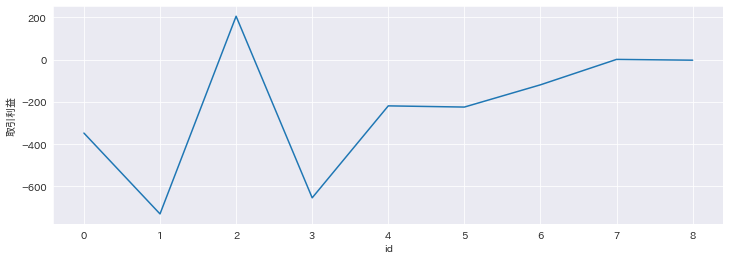

In [14]:
sns.lineplot(data=trades_days, x='id', y="取引利益")

## 取引利益(累計)

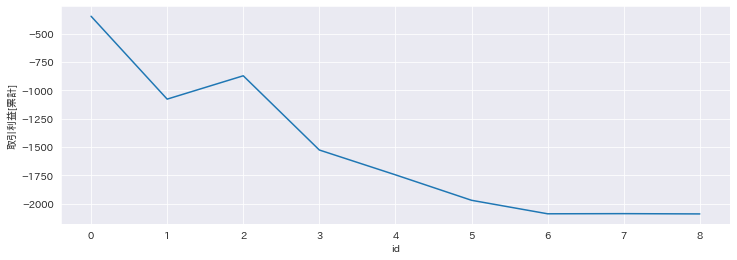

In [15]:
sns.lineplot(data=trades_days, x='id', y="取引利益[累計]")